In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
birth = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [144]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [145]:
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [146]:
for a in birth.columns:
    print(f"{birth[a].name} {len(birth[a].unique())},\t:{birth[a].unique()}")
#     print("{0}:{1}".format(birth[a],birth[a].unique()))

year 40,	:[1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008]
month 12,	:[ 1  2  3  4  5  6  7  8  9 10 11 12]
day 33,	:[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99. nan]
gender 2,	:['F' 'M']
births 3137,	:[  4046   4440   4454 ... 158939 173215 181235]


From the tab above we have columns, length, and the unique data in birth
and we can deduce that the day has 33 unique elements instead of the maximum of 31 and the days are in floats instead of integers 

In [147]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_arr={}
for num,mon in enumerate(months):
    month_arr[num+1]=mon

In [148]:
birth['month_name']=[month_arr[a] for a in birth['month']]

In [149]:
birth.head()

,year,month,day,gender,births,month_name
0,1969,1,1.0,F,4046,Jan
1,1969,1,1.0,M,4440,Jan
2,1969,1,2.0,F,4454,Jan
3,1969,1,2.0,M,4548,Jan
4,1969,1,3.0,F,4548,Jan


In [150]:
decade=10*(birth['year']//10)
decade=decade.astype('str')+'s'
decade.name='decade'
birth['decade']=decade

In [151]:
birth.head()

,year,month,day,gender,births,month_name,decade
0,1969,1,1.0,F,4046,Jan,1960s
1,1969,1,1.0,M,4440,Jan,1960s
2,1969,1,2.0,F,4454,Jan,1960s
3,1969,1,2.0,M,4548,Jan,1960s
4,1969,1,3.0,F,4548,Jan,1960s


In [152]:
birth.pivot_table('births', index='decade',columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


<AxesSubplot:xlabel='decade'>

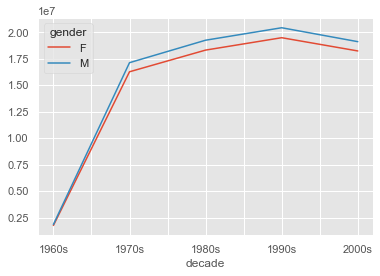

In [153]:
plt.style.use('ggplot')
birth.pivot_table('births', index='decade',columns='gender', aggfunc='sum').plot()


1. This shows that every decade the number of male births has always been more compared to the female births
2. The graph has been lineal untill the era of 1970s when data collection method changed

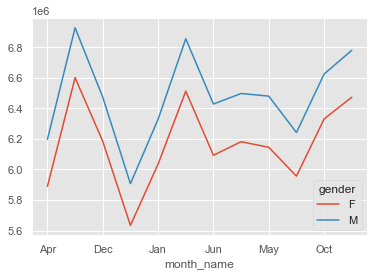

In [155]:
plt.style.use('ggplot')
birth.pivot_table('births', index='month_name',columns='gender', aggfunc=sum).plot()
# plt.gca().xticklabels
sns.set()

In [156]:
# to remove the data whose dates are more than required
quartiles = np.percentile(birth['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [174]:
new_birth=birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [175]:
new_birth['day']=new_birth.loc[:,'day'].astype('int')

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_1040\785930820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_birth['day']=new_birth.loc[:,'day'].astype('int')


In [176]:
new_birth.tail()

,year,month,day,gender,births,month_name,decade
15062,1988,12,29,M,5944,Dec,1980s
15063,1988,12,30,F,5742,Dec,1980s
15064,1988,12,30,M,6095,Dec,1980s
15065,1988,12,31,F,4435,Dec,1980s
15066,1988,12,31,M,4698,Dec,1980s


In [177]:
new_birth.index=pd.to_datetime(10000*new_birth.year+100*new_birth.month+new_birth.day, format='%Y%m%d')

In [178]:
new_birth.head()

,year,month,day,gender,births,month_name,decade
1969-01-01,1969,1,1,F,4046,Jan,1960s
1969-01-01,1969,1,1,M,4440,Jan,1960s
1969-01-02,1969,1,2,F,4454,Jan,1960s
1969-01-02,1969,1,2,M,4548,Jan,1960s
1969-01-03,1969,1,3,F,4548,Jan,1960s


In [179]:
new_birth['dayofweek'] = new_birth.index.isocalendar().day
# week = new_birth.index.isocalendar().weekday
# week
# new_birth.index.week.unique()

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_1040\2734442124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_birth['dayofweek'] = new_birth.index.isocalendar().day


C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_1040\1263350320.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


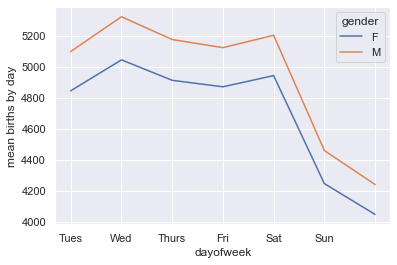

In [180]:
new_birth.pivot_table('births',index='dayofweek',columns='gender',aggfunc=np.mean).plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
sns.set()

###### The data tells us that on Mondays, we have the lowest number of births.
###### These may be due to people having the impression that Monday speaks for all other days in the week 
###### Sundays recorded the next least birth, Sunday have least because people would like ___to go worship___ or They use it to prepare for Mondays' work

In [181]:
birth_by_births=new_birth.pivot_table('births',[new_birth.index.month,new_birth.index.day])

In [182]:
birth_by_births.index=[pd.datetime(1992,month,day) for(month,day) in birth_by_births.index] 

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_1040\4108095418.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birth_by_births.index=[pd.datetime(1992,month,day) for(month,day) in birth_by_births.index]


In [183]:
birth_by_name

,births
1992-01-01,4009.225
1992-01-02,4247.400
1992-01-03,4500.900
1992-01-04,4571.350
1992-01-05,4603.625
...,...
1992-12-27,4850.150
1992-12-28,5044.200
1992-12-29,5120.150
1992-12-30,5172.350


<AxesSubplot:>

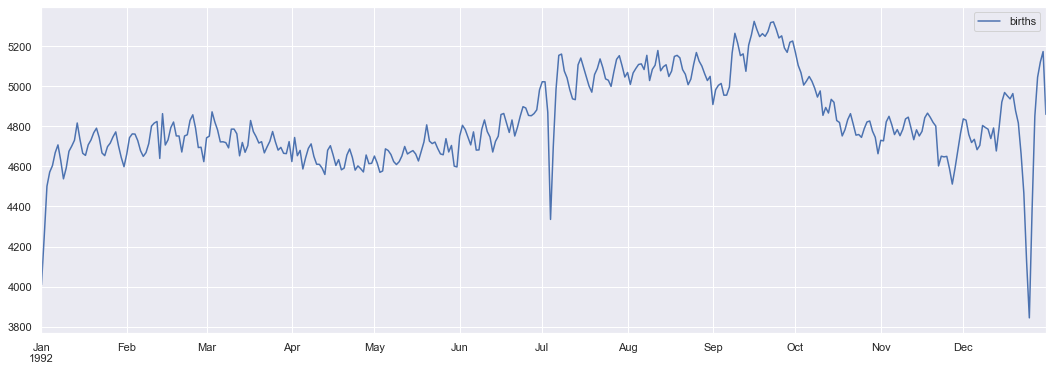

In [184]:
fig, axe = plt.subplots(figsize=(18, 6))
birth_by_births.plot(ax=axe)

In the grah above, we can see that births hit the lowest at Christmas period, New year and the first week of July (Independence day week) in the year 1992

The highest births were recorded throughout September 1992

In [191]:
new_birth_dropped= new_birth.drop(new_birth[(new_birth.index.month==2)&(new_birth.index.day==29)].index)

In [192]:
birth_all_year=new_birth_dropped.pivot_table('births',[new_birth_dropped.index.year,new_birth_dropped.index.month,new_birth_dropped.index.day])

In [193]:
birth_all_year

births
1969 1  1   4243.0
        2   4501.0
        3   4771.0
        4   4480.0
        5   4195.0
...            ...
1988 12 27  5764.0
        28  5923.5
        29  5852.0
        30  5918.5
        31  4566.5

[7300 rows x 1 columns]

In [194]:
birth_all_year.index=[pd.datetime(year,month,day) for (year,month,day) in birth_all_year.index]

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_1040\899629636.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birth_all_year.index=[pd.datetime(year,month,day) for (year,month,day) in birth_all_year.index]


<AxesSubplot:>

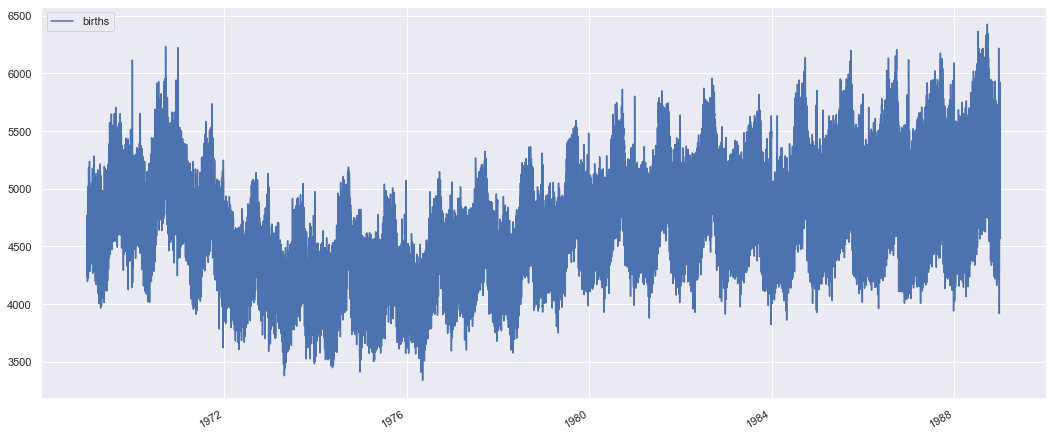

In [195]:
fig1, axe1 = plt.subplots(figsize=(18, 8))
birth_all_year.plot(ax=axe1)